In [160]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [161]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [163]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [164]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
#file_json_contents = file_get_contents("./files_parseds/EDVALDO_260000983413.json")
file_json_contents = file_get_contents("./files_parseds/DELEGADA DANIELLE_260000637328.json")
json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [165]:
stop_words = ["de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df_word = df.head(50)

sentences_dictionary = {}
text_database = []

for sentence, row in df_word.iterrows():
    if sentence not in stop_words:
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]
        sentences_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_dictionary)
print(text_database)

[{'sentence': 'cidade', 'tf-idf': 0.0}, {'sentence': 'compromissos', 'tf-idf': 0.0}, {'sentence': 'compromissos priorit', 'tf-idf': 0.0}, {'sentence': 'desenvolvimento', 'tf-idf': 0.0}, {'sentence': 'diretrizes', 'tf-idf': 0.0}, {'sentence': 'gestão', 'tf-idf': 0.0}, {'sentence': 'implantação', 'tf-idf': 0.0}, {'sentence': 'implementação', 'tf-idf': 0.0}, {'sentence': 'municipal', 'tf-idf': 0.0}, {'sentence': 'população', 'tf-idf': 0.0}, {'sentence': 'priorit', 'tf-idf': 0.0}, {'sentence': 'priorit ários', 'tf-idf': 0.0}, {'sentence': 'programa', 'tf-idf': 0.0}, {'sentence': 'saúde', 'tf-idf': 0.0}, {'sentence': 'serviços', 'tf-idf': 0.0}, {'sentence': 'ários', 'tf-idf': 0.0}]


/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [166]:
tfIdf.shape

(64, 16)

In [167]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,cidade,0.0
1,compromissos,0.0
2,compromissos priorit,0.0
3,desenvolvimento,0.0
4,diretrizes,0.0
5,gestão,0.0
6,implantação,0.0
7,implementação,0.0
8,municipal,0.0
9,população,0.0


In [168]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.2163
Para k=3 o valor Silhoutte foi de 0.2193
Para k=4 o valor Silhoutte foi de 0.2533
Para k=5 o valor Silhoutte foi de 0.2455
Para k=6 o valor Silhoutte foi de 0.2610
Para k=7 o valor Silhoutte foi de 0.2724
Para k=8 o valor Silhoutte foi de 0.2785
Para k=9 o valor Silhoutte foi de 0.2979


In [169]:
km = KMeans(n_clusters=5,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([0, 4, 1, 0, 0, 3, 2, 2, 3, 1, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 0, 2, 0, 1, 0, 1, 0, 4,
       3, 4, 0, 4, 3, 1, 4, 3, 0, 4, 3, 4, 4, 4, 4, 0, 3, 4, 0, 0],
      dtype=int32)

In [170]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts

,sentence,tf-idf,clusters_km
0,cidade,0.0,0
1,compromissos,0.0,4
2,compromissos priorit,0.0,1
3,desenvolvimento,0.0,0
4,diretrizes,0.0,0
5,gestão,0.0,3
6,implantação,0.0,2
7,implementação,0.0,2
8,municipal,0.0,3
9,população,0.0,1


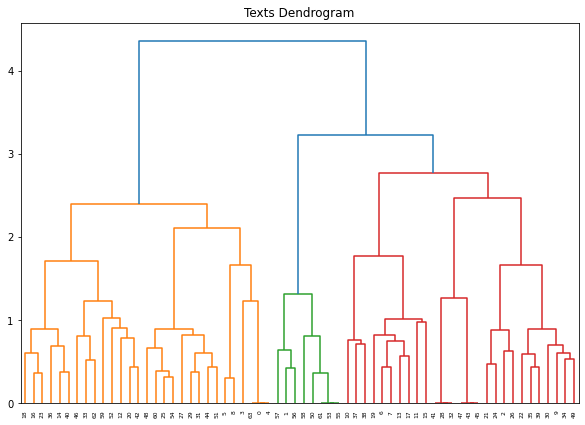

In [171]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)

In [172]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([1, 5, 3, 1, 1, 1, 0, 0, 1, 3, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       3, 2, 3, 6, 3, 6, 4, 6, 3, 6, 4, 2, 3, 3, 2, 0, 0, 3, 2, 4, 2, 4,
       6, 4, 2, 4, 6, 3, 5, 6, 2, 5, 6, 5, 5, 5, 5, 2, 6, 5, 2, 1])

In [173]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,cidade,0.0,0,1
1,compromissos,0.0,4,5
2,compromissos priorit,0.0,1,3
3,desenvolvimento,0.0,0,1
4,diretrizes,0.0,0,1
5,gestão,0.0,3,1
6,implantação,0.0,2,0
7,implementação,0.0,2,0
8,municipal,0.0,3,1
9,população,0.0,1,3


In [174]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,cidade,0.0,0,1
1,compromissos,0.0,4,5
2,compromissos priorit,0.0,1,3
3,desenvolvimento,0.0,0,1
4,diretrizes,0.0,0,1
5,gestão,0.0,3,1
6,implantação,0.0,2,0
7,implementação,0.0,2,0
8,municipal,0.0,3,1
9,população,0.0,1,3


In [175]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[ 1, 15, 11, 10,  2,  6, 14,  3,  8,  0,  5, 12,  9,  7, 13,  4],
       [ 0,  3,  4,  9,  5, 13,  8, 14, 15, 12, 11, 10,  7,  6,  2,  1],
       [ 5,  4, 14,  9,  8,  3,  0, 13, 15, 12, 11, 10,  7,  6,  2,  1],
       [12,  7,  6, 15, 11, 10,  2,  1,  8,  0,  9,  5, 14, 13,  4,  3],
       [13,  4,  6,  8, 12,  7, 15, 11, 10,  2,  1,  0, 14,  5,  9,  3]])

In [176]:
# Criação de uma veriável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [177]:
terms

array(['cidade', 'compromissos', 'compromissos priorit',
       'desenvolvimento', 'diretrizes', 'gestão', 'implantação',
       'implementação', 'municipal', 'população', 'priorit',
       'priorit ários', 'programa', 'saúde', 'serviços', 'ários'],
      dtype=object)

In [178]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(5): 
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms)})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words
0,0,"compromissos, ários, priorit ários, priorit, c..."
1,1,"cidade, desenvolvimento, diretrizes, população..."
2,2,"gestão, diretrizes, serviços, população, munic..."
3,3,"programa, implementação, implantação, ários, p..."
4,4,"saúde, diretrizes, implantação, municipal, pro..."


In [179]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['compromissos, ários, priorit ários, priorit, compromissos priorit, implantação, serviços, desenvolvimento, municipal, cidade']
sentence: cidade
sentence: desenvolvimento
sentence: diretrizes
sentence: serviços

Cluster 1: ['cidade, desenvolvimento, diretrizes, população, gestão, saúde, municipal, serviços, ários, programa']
sentence: compromissos priorit
sentence: população

Cluster 2: ['gestão, diretrizes, serviços, população, municipal, desenvolvimento, cidade, saúde, ários, programa']
sentence: implantação
sentence: implementação
sentence: priorit
sentence: priorit ários
sentence: saúde
sentence: ários

Cluster 3: ['programa, implementação, implantação, ários, priorit ários, priorit, compromissos priorit, compromissos, municipal, cidade']
sentence: gestão
sentence: municipal
sentence: programa

Cluster 4: ['saúde, diretrizes, implantação, municipal, programa, implementação, ários, priorit ários, priorit, compromissos priorit']
sentence: compromissos



In [180]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_dictionary)

plt.imshow(words_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/home/nathanfeitoza/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:410: RuntimeWarning: invalid value encountered in double_scalars
  frequencies = [(word, freq / max_frequency)


ValueError: cannot convert float NaN to integer